<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-первичный-анализ" data-toc-modified-id="Загрузка-данных-и-первичный-анализ-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных и первичный анализ</a></span></li><li><span><a href="#Подгтовка-данных" data-toc-modified-id="Подгтовка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подгтовка данных</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Модели-с-TF-IDF" data-toc-modified-id="Модели-с-TF-IDF-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модели с TF-IDF</a></span></li><li><span><a href="#Модели-с-Bert" data-toc-modified-id="Модели-с-Bert-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модели с Bert</a></span><ul class="toc-item"><li><span><a href="#Transformers-от-Hugging-Face" data-toc-modified-id="Transformers-от-Hugging-Face-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Transformers от Hugging Face</a></span></li><li><span><a href="#Классические-модели-с-BERT" data-toc-modified-id="Классические-модели-с-BERT-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Классические модели с BERT</a></span></li><li><span><a href="#Предобученные-модели" data-toc-modified-id="Предобученные-модели-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Предобученные модели</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

In [1]:
!pip install accelerate>='0.26.0'

In [2]:
!pip install wordcloud -q
!pip install "spacy<3.6"
!python -m spacy download en_core_web_sm
!pip install ipywidgets tqdm
!jupyter nbextension enable --py widgetsnbextension
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

  Using cached spacy-3.5.4.tar.gz (1.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [531 lines of output]
    Using cached setuptools-80.8.0-py3-none-any.whl.metadata (6.6 kB)
    Using cached Cython-0.29.37-py2.py3-none-any.whl.metadata (3.1 kB)
    Using cached cymem-2.0.11-cp312-cp312-win_amd64.whl.metadata (8.8 kB)
    Using cached preshed-3.0.9-cp312-cp312-win_amd64.whl.metadata (2.2 kB)
    Using cached murmurhash-1.0.12-cp312-cp312-win_amd64.whl.metadata (2.2 kB)
    Using cached thinc-8.1.12.tar.gz (190 kB)
    Installing build dependencies: started
    Installing build dependencies: finished with status 'done'
    Getting requirements to build wheel: started
    Getting requirements to build wheel: finished with status 'done'
    Preparing metadata (pyproject.toml): started
    Preparing metadata (pyproject.toml): finished with status 'done'
    Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
    Using cache

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ----- ---------------------------------- 1.8/12.8 MB 7.7 MB/s eta 0:00:02
     ---------- ----------------------------- 3.4/12.8 MB 7.7 MB/s eta 0:00:02
     --------------- ------------------------ 5.0/12.8 MB 7.7 MB/s eta 0:00:02
     ------------------------- -------------- 8.1/12.8 MB 10.1 MB/s eta 0:00:01
     ------------------------------- -------- 10.2/12.8 MB 9.8 MB/s eta 0:00:01
     ------------------------------------ --- 11.8/12.8 MB 9.6 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 8.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook qtconsole run script server
troubleshoot trust

Jupyter command `jupyter-nbextension` not found.
usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
  

In [3]:
import re
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

import nltk
import spacy
import pymorphy2
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

from transformers import (
    BertTokenizer,
    BertForSequenceClassification,
    BertModel,
    Trainer,
    TrainingArguments,
    pipeline,
)

from datasets import Dataset

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
)
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import (
    LogisticRegression,
    SGDClassifier,
)
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud
from tqdm.notebook import tqdm
import evaluate

RANDOM_STATE = 42
tqdm.pandas()

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
spacy.cli.download("en_core_web_sm")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\79104\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\79104\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\79104\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Подготовка

### Загрузка данных и первичный анализ

In [4]:
comments_data_raw = pd.read_csv('toxic_comments.csv')

display(comments_data_raw.head())
comments_data_raw.info()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


Первый столбец выполняет роль индекса(а он у нас и так есть), так что избавимя от него

In [5]:
comments_data_raw.drop('Unnamed: 0', axis=1, inplace=True)

Посмотрим на распределение таргета

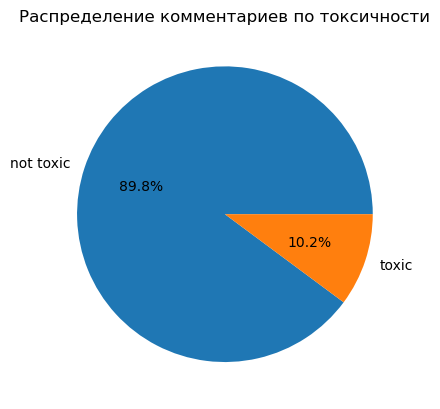

In [6]:
toxic_count = comments_data_raw['toxic'].value_counts()

plt.pie(toxic_count, labels=['not toxic', 'toxic'], autopct='%1.1f%%',)
plt.title('Распределение комментариев по токсичности')
plt.show();

Выходит, что на 9 обычных комментарик приходится 1 токсичный

Теперь взглянем на длину комментариев

In [7]:
comments_data_raw['text_len'] = comments_data_raw['text'].apply(lambda x: len(x.split()))

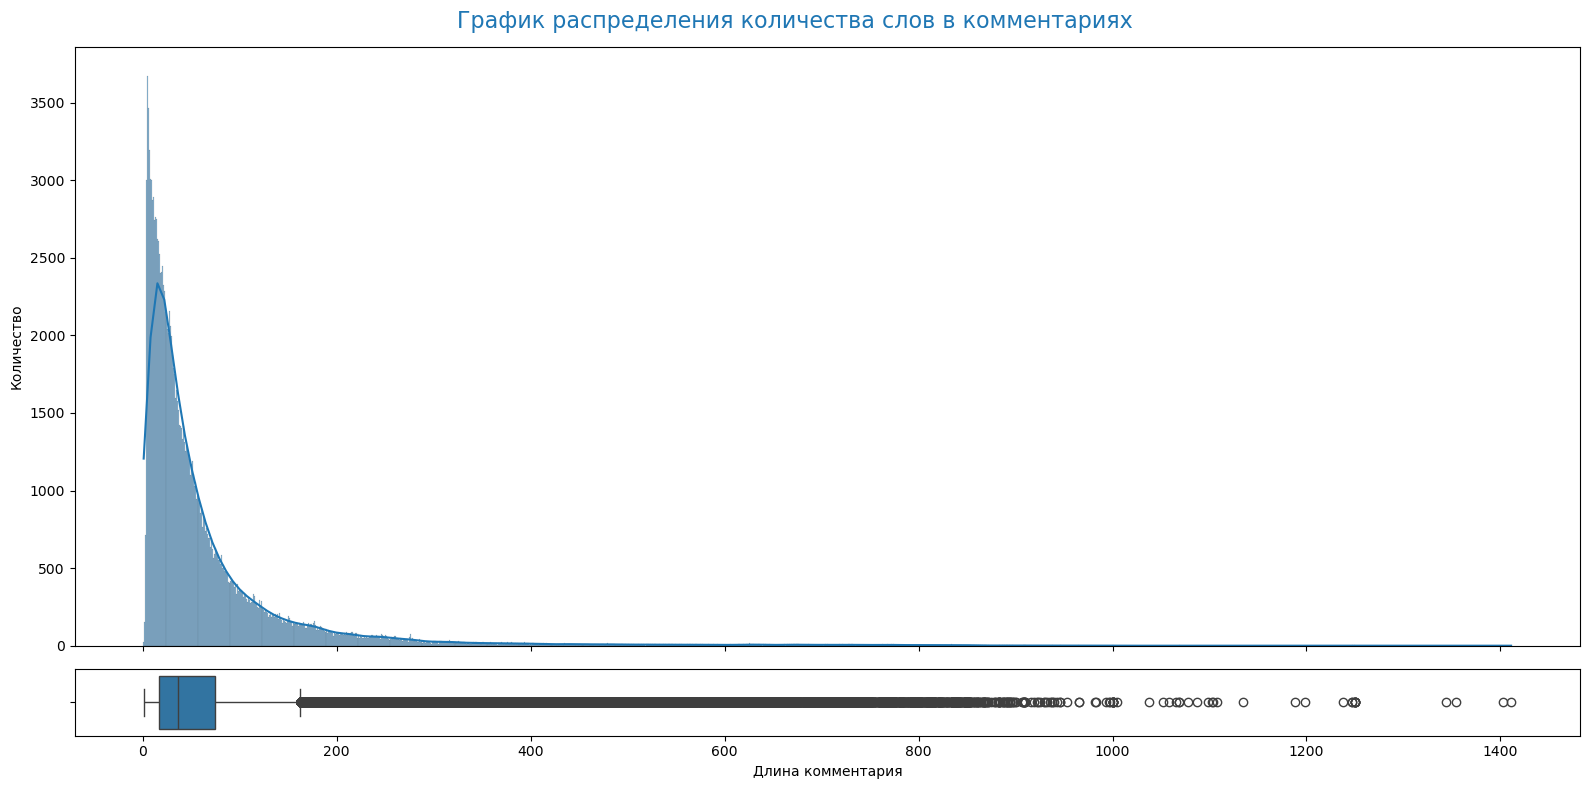

In [8]:
fig, (ax_main, ax_box) = plt.subplots(
    2, sharex=True, gridspec_kw={"height_ratios": (.9, .1)}
)

fig.set_size_inches((16, 8))
sns.histplot(x=comments_data_raw['text_len'], kde=True, discrete=True, ax=ax_main, bins=20).set(ylabel="Количество")
sns.boxplot(x=comments_data_raw['text_len'], ax=ax_box)
plt.suptitle("График распределения количества слов в комментариях", size=16, color="C0")
plt.xlabel("Длина комментария")
plt.tight_layout()
plt.show()

In [9]:
more_than_sixh = comments_data_raw[comments_data_raw['text_len'] > 600]
print('Процет комментариев длиной больше 600 слов:', round(len(more_than_sixh) / len(comments_data_raw) * 100, 3))

Процет комментариев длиной больше 600 слов: 0.88


Как оказалось, комментарии с количеством слов, большим, чем 600, составляют меньше процента. Так что в угоду стабильности модели, а также повышения качества данных, избавимся от этого "хвоста"

In [10]:
comments_data_raw = comments_data_raw[comments_data_raw['text_len'] < 600]

Теперь взглянем, какие слова доминируют в каждом из классов комментариев с помощью облака слов

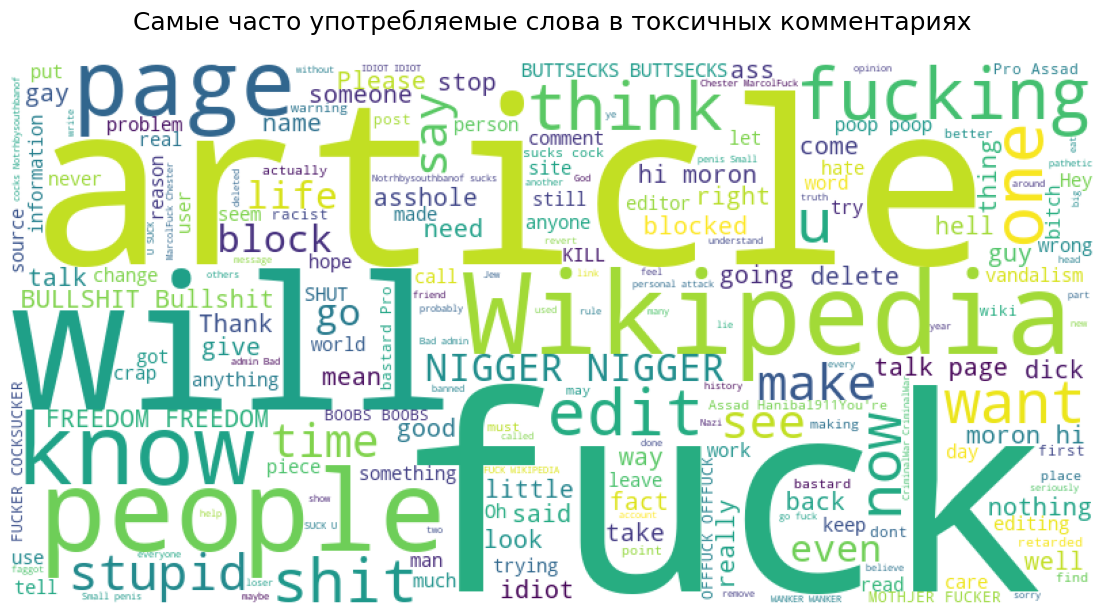

In [11]:
toxic_text = ''.join(comments_data_raw[comments_data_raw['toxic'] == 1]['text'])
ntoxic_text = ''.join(comments_data_raw[comments_data_raw['toxic'] == 0]['text'])


plt.figure(figsize=(14, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(toxic_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Самые часто употребляемые слова в токсичных комментариях', size=18, pad=24)
plt.show()

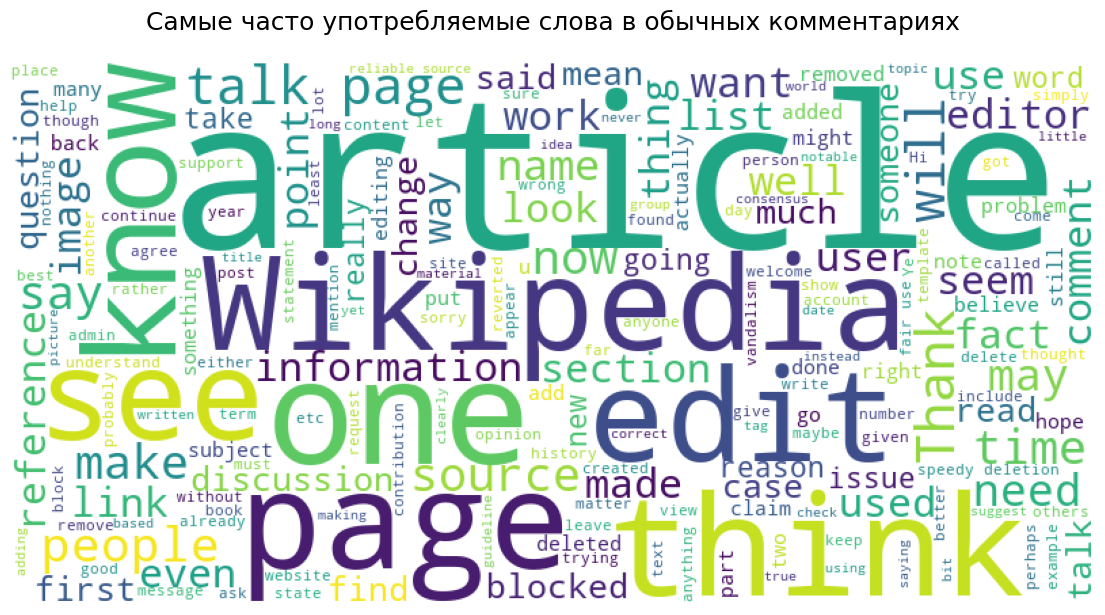

In [12]:
plt.figure(figsize=(14, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ntoxic_text)
plt.imshow(wordcloud); plt.axis('off')
plt.title('Самые часто употребляемые слова в обычных комментариях', size=18, pad=24)
plt.show()

Как можно заметить, в токсичных комментариях кроме оскорблений также присутствует большое количество обычных слов. Кроме того, токсичные записи часто можно отличить по шрифту

Посмотрим, присутствуют ли в данных дубликаты

In [13]:
comments_data_raw.duplicated().sum()

0

### Подгтовка данных

Создадим функции, которые будут предобрабатывать данные

In [14]:
nlp = spacy.load("en_core_web_sm")
# функция, которая лемматизирует данные
def preprocess_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

In [15]:
#функция, которая очищает текст от ненужных символов
def clean_text(text):
    text = text.replace("\\n", " ")       
    text = re.sub(r"[^a-zA-Z0-9\s']", " ", text) 
    text = re.sub(r"\s+", " ", text)   
    return text.strip().lower()

Добавим оценку семантической составляющей сообщения с помощью SentimentIntensityAnalyzer

In [16]:
# Функция, которая определяет семантикуц сообщения(от -1(негативное) до 1(позитивное))
def sia_score(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']

In [17]:
tqdm.pandas()
comments_data = pd.read_csv('prepared_text.csv', index_col=0).dropna()
#comments_data['text'] = comments_data_raw['text'].progress_apply(preprocess_text)
#comments_data['text'] = comments_data['text'].progress_apply(clean_text)
#comments_data['sia'] = comments_data['text'].progress_apply(sia_score)

**В резултате подготовки данных:**

- Был произведён анализ распределения комментариев по токсичности
- Построен график распределения количества слов в комментариях, по которому было определён новый диапазон количества слов
- Были изображены самые часто встречающиеся слова с помощью облака слов
- Произведена подготовка текстов

## Обучение

In [18]:
X, y = comments_data.drop('toxic', axis=1), comments_data['toxic']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.1,
    stratify=y,
    random_state=RANDOM_STATE
)

Cоздадим функцию, которая будет отображать время обучения, время предсказания, f1-score модели и добавлять все эти параметры в словарь

In [19]:
# отображает время обучения, время предсказания, f1-score модели и добавляет все эти параметры в словарь
def find_preprocessing_time(model):
    results_df = pd.DataFrame(model.cv_results_)
    best_score_df = results_df[results_df['rank_test_score'] == 1]

    model_stat = {'Время обучения': round(best_score_df['mean_fit_time'].iloc[0], 3),
                  'Время предсказания': round(best_score_df['mean_score_time'].iloc[0], 3),
                  'F1-score': round(model.best_score_, 3)}
    for key, val in model_stat.items():
        print(f'{key}: {val}')
    
    return model_stat

Добавим трансформер для преобразование текста в векторы для TF-IDF

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(), 'text')
    ]
)

### Модели с TF-IDF

Построим модель логистической регрессии, используя TF-IDF

In [21]:
log_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('log', LogisticRegression(max_iter=3000, random_state=RANDOM_STATE))
])

In [22]:
log_params = {
    'log__C': [0.1, 1.5, 3],
}

Так как данных очень много, подбор гиперпараметров для каждой модели будет занимать большое количество времени. Укоротим датасет, пока будем искать гиперпараметры

In [23]:
log_search = GridSearchCV(
    log_pipe,
    log_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

log_search.fit(X_train, y_train)
log_stat = find_preprocessing_time(log_search)
print('Параметры модели:', log_search.best_params_)

Время обучения: 8.291
Время предсказания: 0.988
F1-score: 0.778
Параметры модели: {'log__C': 3}


Отличная скорость обучения и неплохие результаты предсказания

Теперь посмотрим, как покажет себя связка TF-IDF и NaiveBayes

In [24]:
bayes_pipe = Pipeline([
    ('preprocessor', preprocessor),           
    ("bayes", MultinomialNB())          
])

bayes_params = {
    'bayes__alpha': [0.01, 0.05, 0.1, 0.3],
}

In [25]:
bayes_search = GridSearchCV(
    bayes_pipe,
    bayes_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

bayes_search.fit(X_train, y_train)
bayes_stat = find_preprocessing_time(bayes_search)
print('Параметры модели:', bayes_search.best_params_)

Время обучения: 6.176
Время предсказания: 1.548
F1-score: 0.66
Параметры модели: {'bayes__alpha': 0.01}


К сожалению, модель показала себя значительно хуже логистической регрессии по всем параметрам

In [26]:
svc_pipe = Pipeline([
    ('preprocessor', preprocessor),          
    ("svc", LinearSVC(class_weight='balanced', random_state=RANDOM_STATE))          
])

svc_params = {
    'svc__C': [0.1, 1, 2, 3]
}

In [27]:
svc_search = GridSearchCV(
    svc_pipe,
    svc_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

svc_search.fit(X_train, y_train)
svc_stat = find_preprocessing_time(svc_search)
print('Параметры модели:', svc_search.best_params_)

Время обучения: 11.87
Время предсказания: 1.551
F1-score: 0.771
Параметры модели: {'svc__C': 1}


SVC показала себя неплохо, но так и не смогла обогнать LogisticRegression по качеству предсказаний и скорости обучения

SGD хорош при работе с большими объёмами данных и разреженными матрицами(которую и представляет нам tf-idf). Посмотрим на результаты этой модели

In [28]:
sgdc_pipe = Pipeline([
    ('preprocessor', preprocessor),           
    ("sgdc", SGDClassifier(random_state=RANDOM_STATE))          
])

sgdc_params = {
    'sgdc__loss': ['hinge', 'modified_huber'],
    'sgdc__alpha': [1e-4, 1e-3, 1e-2],
    'sgdc__penalty': ['l2', 'elasticnet']
#     'sgdc__max_iter': [1000, 3000],
#     'sgdc__class_weight': [None, 'balanced']
}

In [29]:
sgdc_search = GridSearchCV(
    sgdc_pipe,
    sgdc_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

sgdc_search.fit(X_train, y_train)
sgdc_stat = find_preprocessing_time(sgdc_search)
print('Параметры модели:', sgdc_search.best_params_)

Время обучения: 7.05
Время предсказания: 1.552
F1-score: 0.742
Параметры модели: {'sgdc__alpha': 0.0001, 'sgdc__loss': 'modified_huber', 'sgdc__penalty': 'l2'}


Хороший результат, но также далеко до LogisticRegression

Модели с использованием статистического метода tf-idf показали довольно неплохую точность, обучаясь на урезанном датасете

### Модели с Bert

#### Transformers от Hugging Face

Заменим название целевой колонки на label

In [30]:
df = comments_data.rename({'toxic':'labels'}, axis=1)
df = df[["text", "labels"]]

In [31]:
train_df, test_df = train_test_split(df, test_size=0.1, stratify=df["labels"], random_state=RANDOM_STATE)
test_df, val_df = train_test_split(df, test_size=0.5, stratify=df["labels"], random_state=RANDOM_STATE)

Преобразуем данные в huggingface Dataset

In [32]:
train_dataset = Dataset.from_pandas(train_df[:10000])
val_dataset = Dataset.from_pandas(val_df[:10000])
test_dataset = Dataset.from_pandas(test_df[:10000])

Загрузим токенизатор и модель

In [33]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
#model = BertForSequenceClassification.from_pretrained('./saved_model')
#tokenizer = BertTokenizer.from_pretrained('./saved_model')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Произведём токинезацию датасета

In [34]:
# Функция токенизации
def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True)

# Токенизация датасета
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Удалим старые колонки

In [35]:
train_dataset = train_dataset.remove_columns(["text"])
val_dataset = val_dataset.remove_columns(["text"])

Форматируем для pytorch

In [36]:
train_dataset.set_format("torch")
val_dataset.set_format("torch")
test_dataset.set_format("torch")

Зададим аргументы обучения для BERT

In [37]:
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    do_eval=True,
)

# training_args = TrainingArguments(
#     output_dir="./saved_model",
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=8,
#     num_train_epochs=3,
#     weight_decay=0.01,
#     logging_dir='./logs',
#     do_eval=True,
# )

Определим f1-метрику

In [38]:
metric = evaluate.load('f1')
def compute_metrics(eval_pred):
	logits, labels = eval_pred
	predictions = np.argmax(logits, axis=-1)
	return metric.compute(predictions=predictions, references=labels)

Начнём тренировку модели

In [39]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics = compute_metrics
)

trainer.train()
trainer.save_state()

C:\Users\79104\AppData\Local\Temp\ipykernel_968\461149681.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
500,0.244000
1000,0.150300
1500,0.126400
2000,0.098000
2500,0.081600
3000,0.042700
3500,0.032800


In [40]:
trainer.save_model('./saved_model') 
tokenizer.save_pretrained('./saved_model') 

('./saved_model\\tokenizer_config.json',
 './saved_model\\special_tokens_map.json',
 './saved_model\\vocab.txt',
 './saved_model\\added_tokens.json')

In [41]:
trainer.save_state()

Сохраним метрики модели

In [44]:
log_history = trainer.state.log_history
eval_metrics = trainer.evaluate()

train_runtime = None
for log in log_history:
    if 'train_runtime' in log:
        train_runtime = log['train_runtime']
        break

berthg_stat = {'Время обучения': round(train_runtime, 3),
                  'Время предсказания': round(eval_metrics['eval_runtime'], 3),
                  'F1-score': round(eval_metrics['eval_f1'], 3)}

In [45]:
berthg_stat

{'Время обучения': 1306.789, 'Время предсказания': 132.219, 'F1-score': 0.814}

Неплохая точность, но слишком большое время обучения

#### Классические модели с BERT

Постараемся использовать Bert для получения эмбеддингов, на которых можно обучать обычные модели классификации

In [46]:
# проходит по всем текстам и по очереди извлекает эмбеддинги
def get_bert_embeddings(texts, model, tokenizer, batch_size=32):
    all_embeddings = []
    model.eval()

    with torch.no_grad():
        for i in range(0, len(texts), batch_size):
            batch = texts[i:i+batch_size]
            inputs = tokenizer(batch, padding=True, truncation=True, return_tensors="pt", max_length=256)
            inputs = {k: v.to(device) for k, v in inputs.items()}
            outputs = model(**inputs)
            pooled = outputs.pooler_output  # [CLS] эмбеддинг
            all_embeddings.append(pooled.cpu())

    return torch.cat(all_embeddings).numpy()

In [47]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer2 = BertTokenizer.from_pretrained('bert-base-uncased')
model2 = BertModel.from_pretrained('bert-base-uncased').to(device)

embeddings = get_bert_embeddings(comments_data['text'][:10000].tolist(), model2, tokenizer)
embeddings_df = pd.DataFrame(embeddings)
embeddings_df.to_csv("bert_embeddings.csv", index=False)

Обучим модель LogisticRegression на полученных эмбеддингах

In [48]:
X_bert = embeddings
y_bert = comments_data['toxic'][:10000]

X_trainb, X_testb, y_trainb, y_testb = train_test_split(X_bert, y_bert, test_size=0.1, random_state=42)

In [49]:
blog = LogisticRegression(max_iter=3000)
blog_params = {'C': [0.1, 1.5, 3]}
blog_search = GridSearchCV(
    blog,
    blog_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

blog_search.fit(X_trainb, y_trainb)
blog_stat = find_preprocessing_time(blog_search)
print('Параметры модели:', blog_search.best_params_)

Время обучения: 7.927
Время предсказания: 0.014
F1-score: 0.667
Параметры модели: {'C': 3}


К сожалению, точность модели оставляет желать лучшего

#### Предобученные модели

Классификация токсичности комментариев - далеко не новая задача, за последние годы было предобучено большое количество моделей, которые показывают себя хорошо на любых данных. Воспользуемся одной из таких моделей

In [50]:
toxicity_classifier = pipeline(
    "text-classification", 
    model="unitary/toxic-bert",
    tokenizer="unitary/toxic-bert",
    device=0 
)

Device set to use cuda:0


In [51]:
texts = comments_data['text'][:10000].tolist()

start_time = time.time()
results = toxicity_classifier(texts, truncation=True, max_length=512)
end_time = time.time()
total_time = end_time - start_time

labels = [1 if r['score'] > 0.25 else 0 for r in results]
f1 = f1_score(y_test[:10000], labels)

pre_bert_stat = {'Время обучения': np.NaN,
                  'Время предсказания': round(total_time, 3),
                  'F1-score': round(f1, 3)}
print(pre_bert_stat)

{'Время обучения': nan, 'Время предсказания': 71.184, 'F1-score': 0.106}


Видимо, unitary/toxic-bert всё же не подходит для нашей задачи

## Анализ моделей

Оценим все модели и выберем лучшую, основываясь на таких критериях как точность предсказания, скорость обучения и скорость предсказания

In [52]:
models = ['LogisticRegression',
          'MultinovialNB',
          'LinearSVC',
          'SGDClassifier',
          'Hugging Face Bert',
          'Bert LogisticRegression',
          'unitary/toxic-bert'
]
models_info = [log_stat, bayes_stat, svc_stat, sgdc_stat, berthg_stat, blog_stat, pre_bert_stat]

pd.DataFrame(models_info, index=models)

,Время обучения,Время предсказания,F1-score
LogisticRegression,8.291,0.988,0.778
MultinovialNB,6.176,1.548,0.660
LinearSVC,11.870,1.551,0.771
SGDClassifier,7.050,1.552,0.742
Hugging Face Bert,1306.789,132.219,0.814
Bert LogisticRegression,7.927,0.014,0.667
unitary/toxic-bert,NaN,71.184,0.106


Обычная логистическая регрессия представляет из себя золотую середину по представленными метрикам: достаточно быстрая и довольно точная. В том случае, если заказчику очень важна скорость обучения модели, то также можно рассмотреть MultinomialNB и SGDClassifier в качестве инструмента. Но у неё худшие результаты предсказания, так что возьмём LogisticRegression в качестве лучшей модели.

Обучим алгоритм логистической регрессии с лучшими параметрами на всех тренировочных данных, а затем узнаем метрику модели на тестовых данных

In [53]:
y_pred = log_search.best_estimator_.predict(X_test)
print('F1-score лучшей модели на тестовых данных:', round(f1_score(y_test, y_pred), 3))

F1-score лучшей модели на тестовых данных: 0.774


Отличный результат! Мы получили модель, которая бустро обучается, быстро предсказывает, а так же неплохо оценивает токсичность комментариев

Проверим модель на адекватность с помощью DummyClassifier

In [54]:
dummy_pipe = Pipeline([
    ('preprocessor', preprocessor),            
    ("model", DummyClassifier(strategy = 'constant', constant = 1))            
])
dummy_pipe.fit(X_train, y_train)

y_pred_d = dummy_pipe.predict(X_test)
print('F1-score тривиальной модели:', round(f1_score(y_test, y_pred_d), 3))

F1-score тривиальной модели: 0.184


Наша модель значительно превосходит тривиальное решение, которое предсказывает токсичность комментария в зависимости от количества того или иного класса

Таким образом, полученная модель модель(LogisticRegression) находит хороший баланс между точностью (precision) и полнотой (recall), и в среднем она справляется на уровне 78% от идеального результата (1.0), обучается за 7 секунд, а делает предсказания за 0.45 секунды(на самом деле, тут всё зависит от объёма данных). Она обладает параметрами: C=3, penalty='l1', solver='liblinear'.

## Выводы

**В ходе работы:**

- Был произведён первичный анализ данных
    - изучено распределение комментариев по токсичности и количеству слов
    - были удалены тексты со слишком больши количеством слов(шумы)
    - изображена частотность появления слов в комментариях
    - произведена подготовка текстов
    
    
- Было обучено 4  модели, среди которых лучшей оказалась модель LogisticRegression( C=3, penalty='l1', solver='liblinear') Её точность предсказания(f1-score) составляет 78%, а время обучения и предсказания являются достаточно небольшими